In [68]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Load dataset (update with your local CSV path)
df = pd.read_csv("interview_scores_dataset.csv")
df.shape

(100, 6)

In [70]:
# Prepare data
X = df[['communication_score', 'technical_score', 'motivation_score', 'notes_score', 'video_score']]
y = df['overall_score']

In [71]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
# Predict
y_pred = model.predict(X_test)

In [74]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [75]:
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

cv_scores = cross_val_score(model, X, y, cv=10)

print(f"Mean R²: {cv_scores.mean():.3f}")
print(f"Std Dev R²: {cv_scores.std():.3f}")

RMSE: 0.361
MAE: 0.301
R²: 0.832
Mean R²: 0.856
Std Dev R²: 0.062


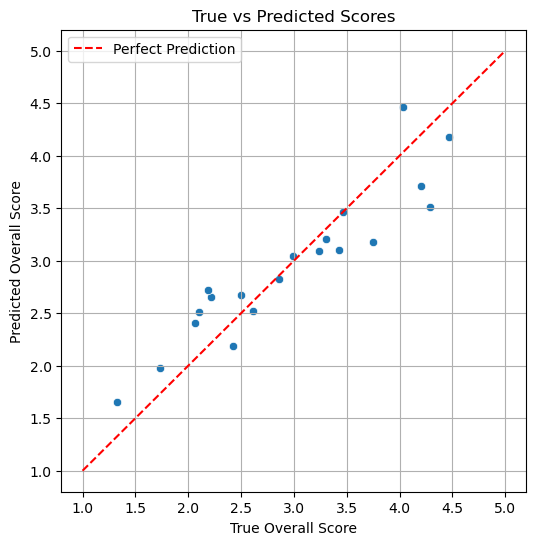

In [76]:
# True vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([1, 5], [1, 5], 'r--', label='Perfect Prediction')
plt.xlabel("True Overall Score")
plt.ylabel("Predicted Overall Score")
plt.title("True vs Predicted Scores")
plt.legend()
plt.grid(True)
plt.show()

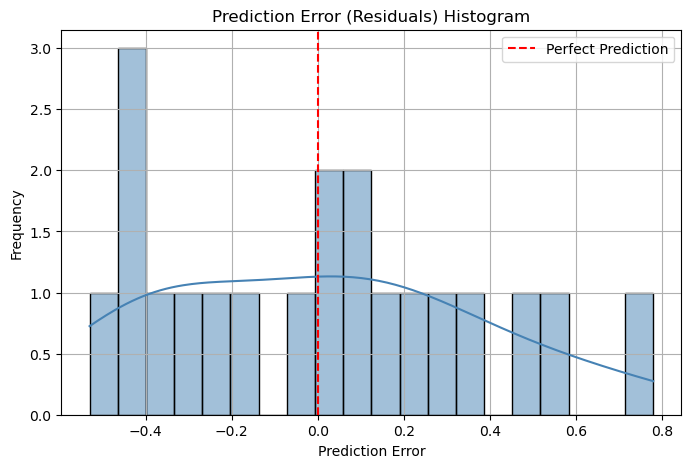

In [77]:
# Residuals (errors)
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color="steelblue")
plt.title("Prediction Error (Residuals) Histogram")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label="Perfect Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [78]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [79]:
# Create the model
gb_model = HistGradientBoostingRegressor(max_iter=200, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

HistGradientBoostingRegressor(max_iter=200, random_state=42)

In [80]:
# Predict
y_pred_gb = gb_model.predict(X_test)

In [81]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

cv_scores_gb = cross_val_score(gb_model, X, y, cv=10)

print(f"Mean R²: {cv_scores_gb.mean():.3f}")
print(f"Std Dev R²: {cv_scores_gb.std():.3f}")

Gradient Boosting RMSE: 0.281
MAE: 0.230
R²: 0.898
Mean R²: 0.892
Std Dev R²: 0.062


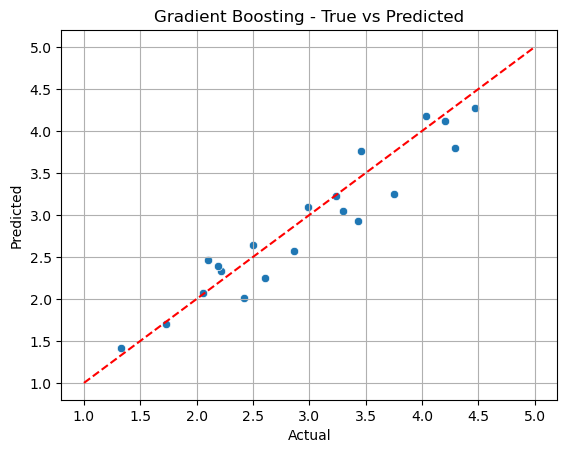

In [82]:
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting - True vs Predicted")
plt.grid(True)
plt.show()


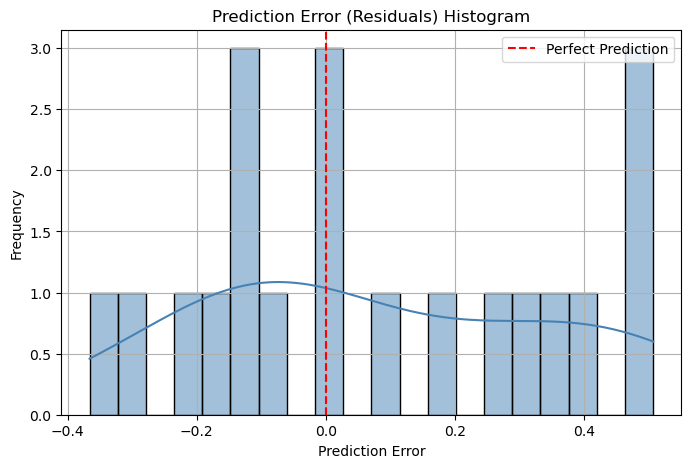

In [83]:
# Residuals (errors)
residuals = y_test - y_pred_gb

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color="steelblue")
plt.title("Prediction Error (Residuals) Histogram")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label="Perfect Prediction")
plt.legend()
plt.grid(True)
plt.show()


📊 Performance Comparison:

| Metric              | Random Forest | Gradient Boosting | Better Model        |
| ------------------- | ------------- | ----------------- | ------------------- |
| **RMSE**            | 0.361         | **0.281**         | ✅ Gradient Boosting |
| **MAE**             | 0.301         | **0.230**         | ✅ Gradient Boosting |
| **R² Score**        | 0.832         | **0.898**         | ✅ Gradient Boosting |
| **Mean R² (CV)**    | 0.856         | **0.892**         | ✅ Gradient Boosting |
| **Std Dev R² (CV)** | 0.062         | 0.062             | ➖ Same              |

Conclusion: Gradient Boosting provides more accurate and reliable predictions, making it the optimal choice for this regression task.